# Proyecto FraudKeeper

Primero se importan las librerías que vamos a utilizar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

### Importación de los datos

In [2]:
path = "/Users/ceciliaguillametchargue/Proyecto_FraudKeeper/insurance_exercise.csv"
df = pd.read_csv(path)

### Análisis descriptivo de los datos

In [3]:
pd.options.display.max_columns = 0  # permite observar todas las columnas del conjunto de datos.
df.head(10)

days_as_customer  age  policy_number  ... auto_year fraud_reported _c39
0               328   48         521585  ...      2004              Y  NaN
1               228   42         342868  ...      2007              Y  NaN
2               134   29         687698  ...      2007              N  NaN
3               256   41         227811  ...      2014              Y  NaN
4               228   44         367455  ...      2009              N  NaN
5               256   39         104594  ...      2003              Y  NaN
6               137   34         413978  ...      2012              N  NaN
7               165   37         429027  ...      2015              N  NaN
8                27   33         485665  ...      2012              N  NaN
9               212   42         636550  ...      1996              N  NaN

[10 rows x 40 columns]

En las primeras 10 filas se puede observar que hay variables que cuentan con signos de interrogación y otras con datos faltantes.

In [4]:
df.describe()

days_as_customer          age  ...    auto_year  _c39
count       1000.000000  1000.000000  ...  1000.000000   0.0
mean         203.954000    38.948000  ...  2005.103000   NaN
std          115.113174     9.140287  ...     6.015861   NaN
min            0.000000    19.000000  ...  1995.000000   NaN
25%          115.750000    32.000000  ...  2000.000000   NaN
50%          199.500000    38.000000  ...  2005.000000   NaN
75%          276.250000    44.000000  ...  2010.000000   NaN
max          479.000000    64.000000  ...  2015.000000   NaN

[8 rows x 19 columns]

Se puede observar que:

    - La variable _c39 no cuenta con ningún valor, por lo tanto se la puede eliminar.
    
    - El resto de las variables numéricas no tiene datos faltantes.

In [5]:
df.describe(include = object)

policy_bind_date policy_state  ... auto_model fraud_reported
count              1000         1000  ...       1000           1000
unique              951            3  ...         39              2
top            8/5/1992           OH  ...        RAM              N
freq                  3          352  ...         43            753

[4 rows x 21 columns]

La variable **"policy_number"**, **"incident_location"**, **"policy_bind_date"**, **"incident_date"** y **"insured_zip"** se eliminarán dado que cuentan con muchos valores distintos.

In [6]:
### Eliminación de variables

df.drop(['policy_number', 'insured_zip', '_c39', 'incident_location', 'policy_bind_date', 'incident_date'], axis = 1, inplace = True)

In [7]:
df.dtypes

days_as_customer                 int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available  

Observando los datos se identifica que la variable collision type no siempre será utilizada dado que depende del tipo de incidente. Para observar esto con más detalle realizamos la siguiente tabla:

In [8]:
pd.crosstab(index = df['incident_type'],
        columns = df['collision_type'])

collision_type             ?  Front Collision  Rear Collision  Side Collision
incident_type                                                                
Multi-vehicle Collision    0              115             152             152
Parked Car                84                0               0               0
Single Vehicle Collision   0              139             140             124
Vehicle Theft             94                0               0               0

Los signos ? ocurren dado que la variable collision_type no corresponde ser respondida.

In [9]:
### Reemplazamos los signos de interrogración

df['collision_type'].replace('?', 'not applicable', inplace = True)
df.replace('?', np.nan, inplace = True)

In [10]:
pd.set_option('max_rows', None)
df.isnull().sum()

days_as_customer                 0
age                              0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_type                    0
collision_type                   0
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries                  0
witnesses                        0
police_report_available        343
total_claim_amount               0
injury_claim                     0
property_claim      



Vemos ahora que **'property_damage'** y **'police_report_available'** presentan valores faltantes

Dado que la variable **'auto_model'** presenta tanto posibles valores distintos la recategorizamos

In [11]:
### Recategorización de 'auto_model'

df["auto_model"] = np.where(df["auto_model"] == "92x", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "E400", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "RAM", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Tahoe", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "RSX", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "95", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Pathfinder", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "A5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Camry", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "F150", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "A3", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Highlander", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Neon", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "MDX", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Maxima", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Legacy", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "TL", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Impreza", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Forrestor", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Escape", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Corolla", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "3 series", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "C300", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Wrangler", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "M5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "X5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Civic", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Passat", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Silverado", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "CRV", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "93", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Accord", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "X6", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Malibu", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Fusion", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Jetta", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "ML350", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Ultima", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Grand Cherokee", "Gama alta", df["auto_model"])

In [12]:
### Juntamos categorías 'husband' y 'wife'

df["insured_relationship"] = np.where(df["insured_relationship"] == 'husband', 'married', df["insured_relationship"])
df["insured_relationship"] = np.where(df["insured_relationship"] == 'wife', 'married', df["insured_relationship"])

In [13]:
df.head()

days_as_customer  age policy_state  ...  auto_model  auto_year  fraud_reported
0               328   48           OH  ...   Gama alta       2004               Y
1               228   42           IN  ...   Gama alta       2007               Y
2               134   29           OH  ...   Gama alta       2007               N
3               256   41           IL  ...  Gama media       2014               Y
4               228   44           IL  ...  Gama media       2009               N

[5 rows x 34 columns]

In [14]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

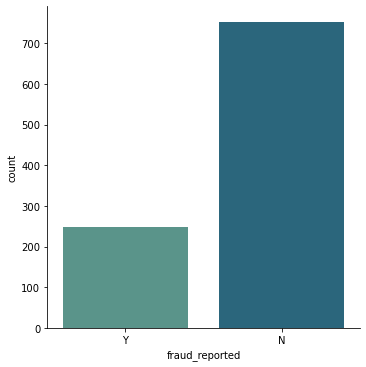

In [15]:
sns.catplot(x = "fraud_reported", data = df, kind = "count", palette = "crest")

Vemos que los datos son desbalanceado. Esto lo debemos tener en cuenta al momento del análisis.

Analizamos las variables cuantitativas según si hubo fraude o no.

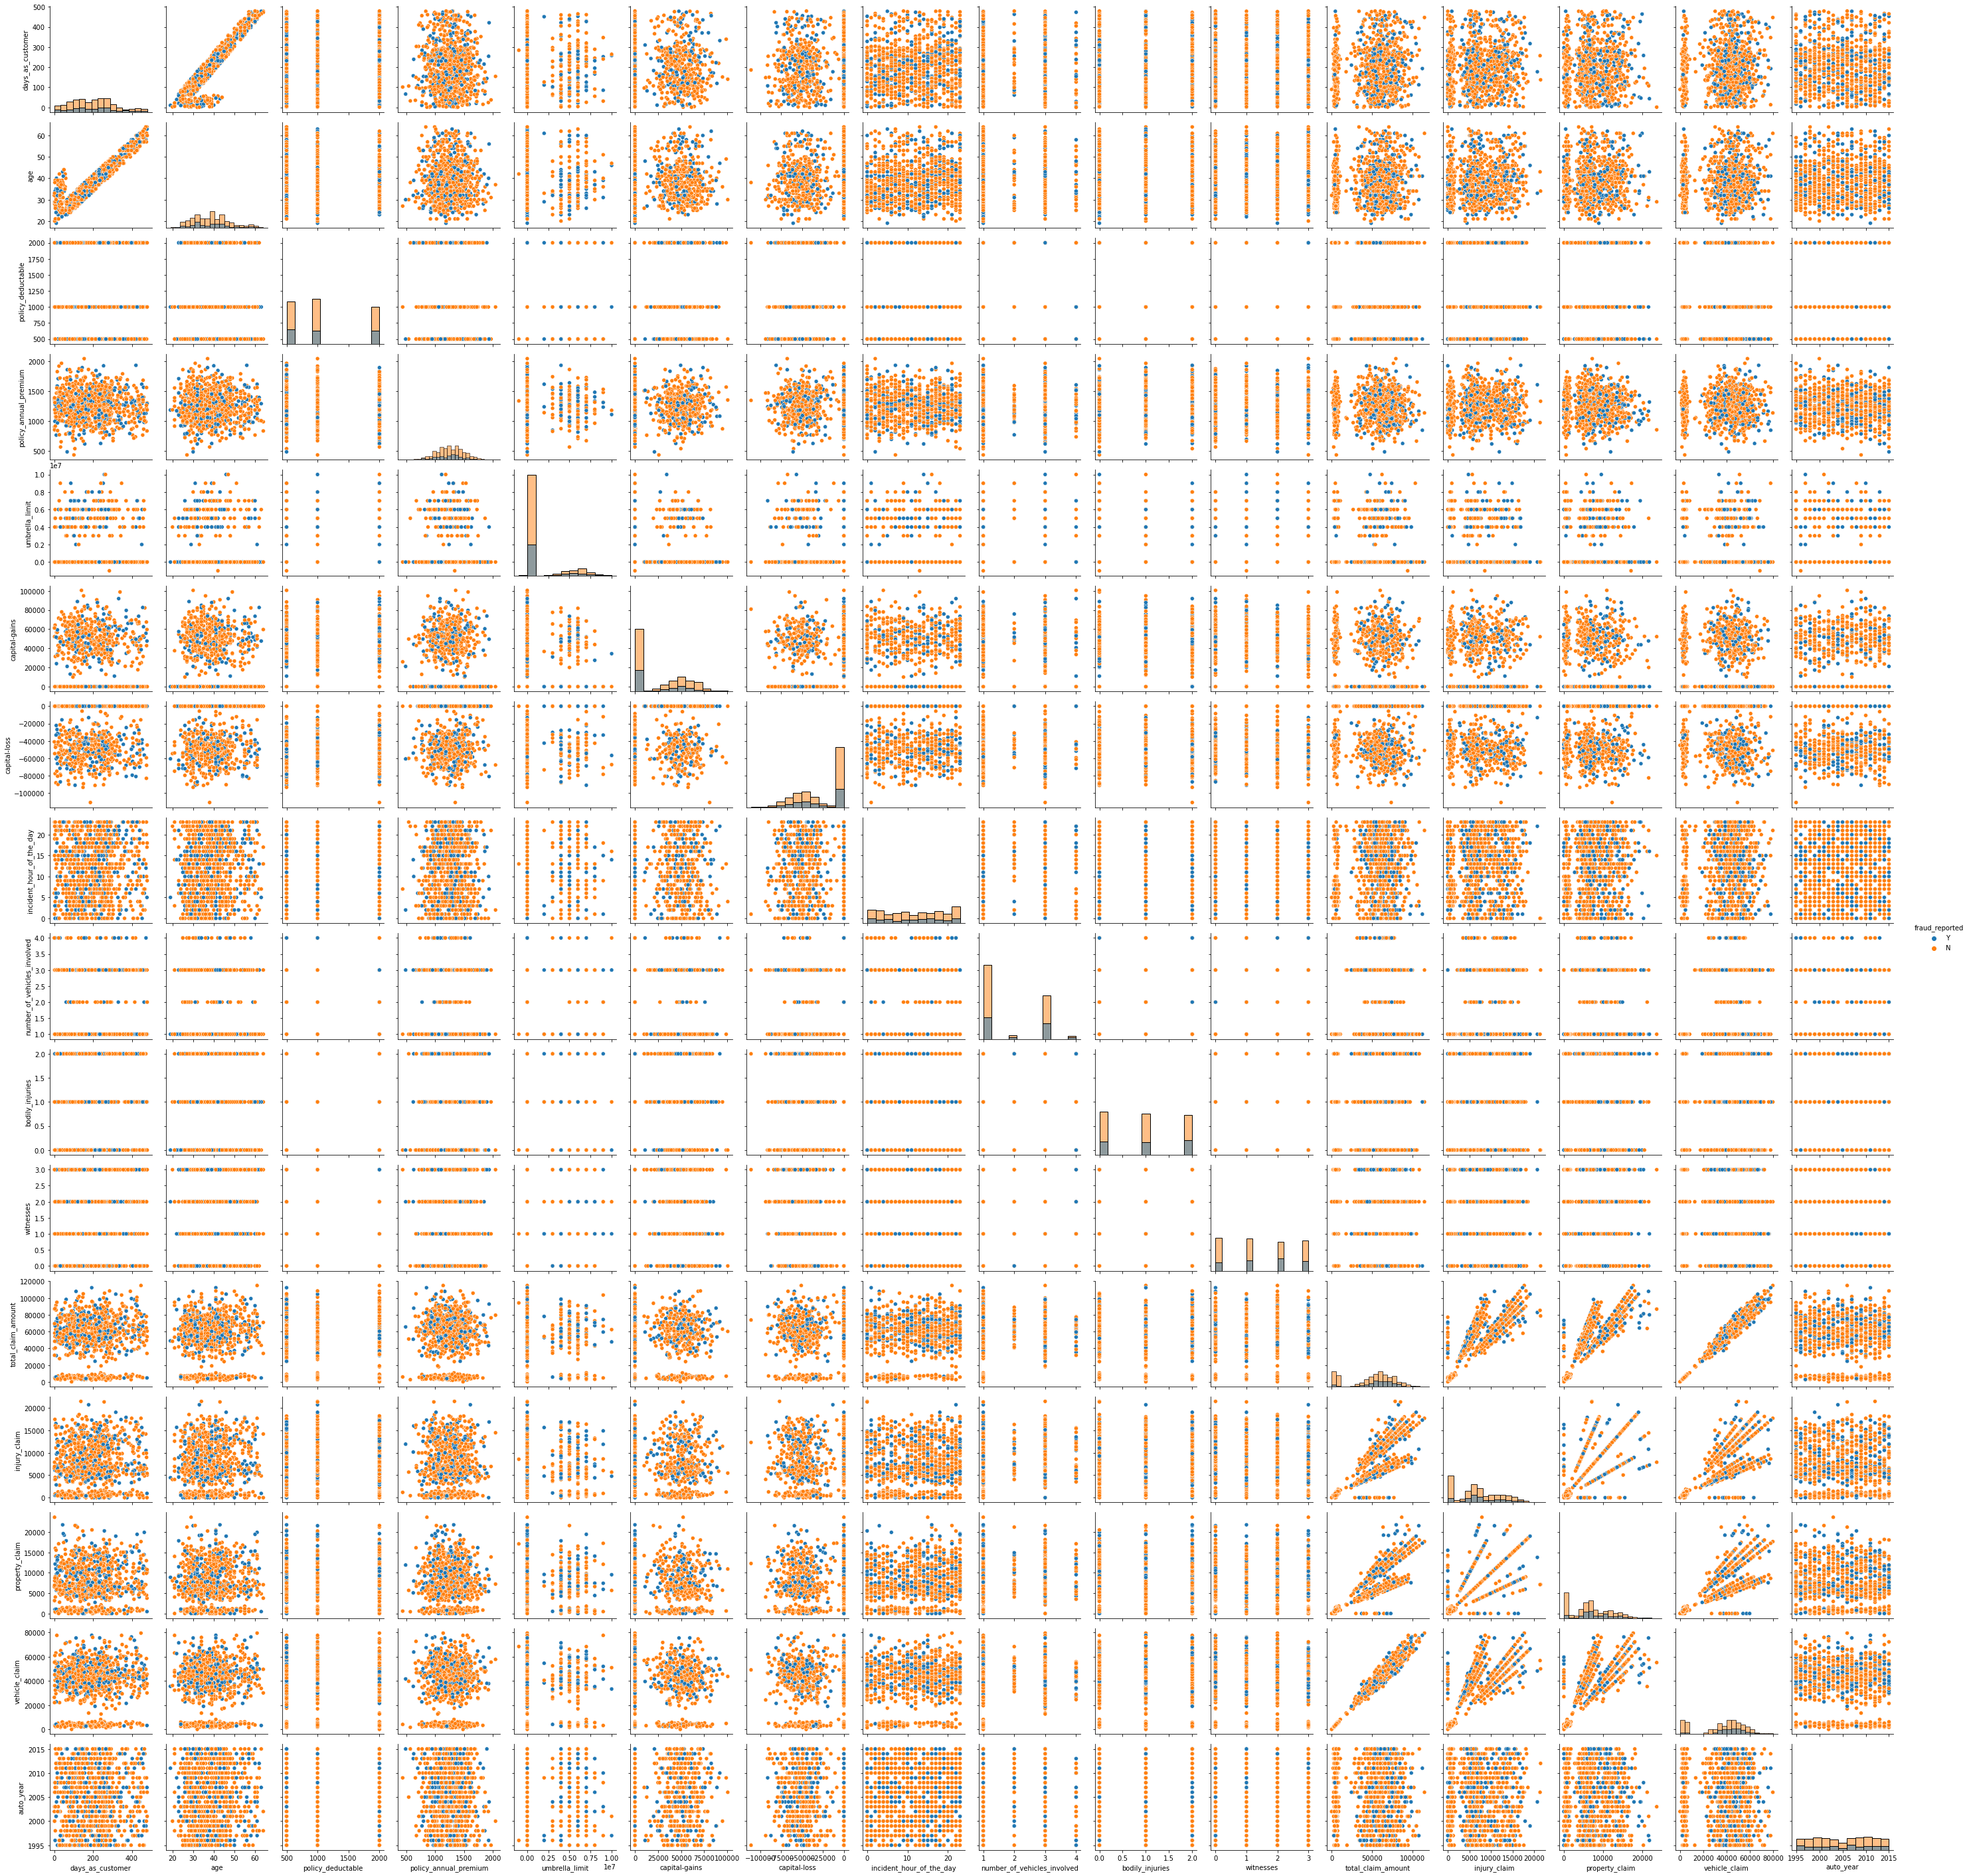

In [16]:
g = sns.PairGrid(df, hue = 'fraud_reported')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

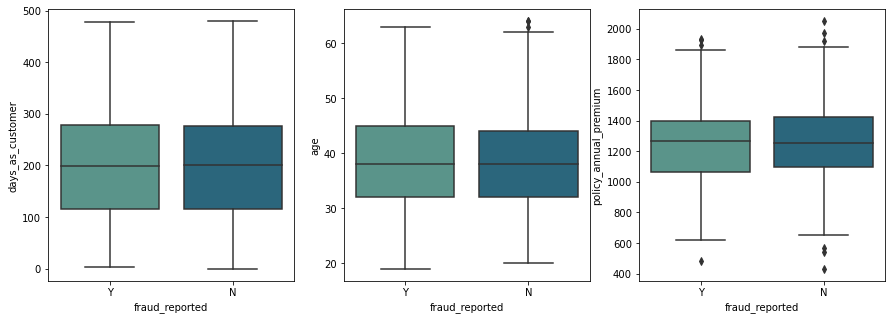

In [17]:
fig, axes = plt.subplots(1, 3, figsize = (15,5))
sns.boxplot(ax = axes[0], x = "fraud_reported", y = "days_as_customer", data = df, palette = "crest")
sns.boxplot(ax = axes[1], x = "fraud_reported", y = "age", data = df, palette = "crest")
sns.boxplot(ax = axes[2], x = "fraud_reported", y = "policy_annual_premium", data = df, palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

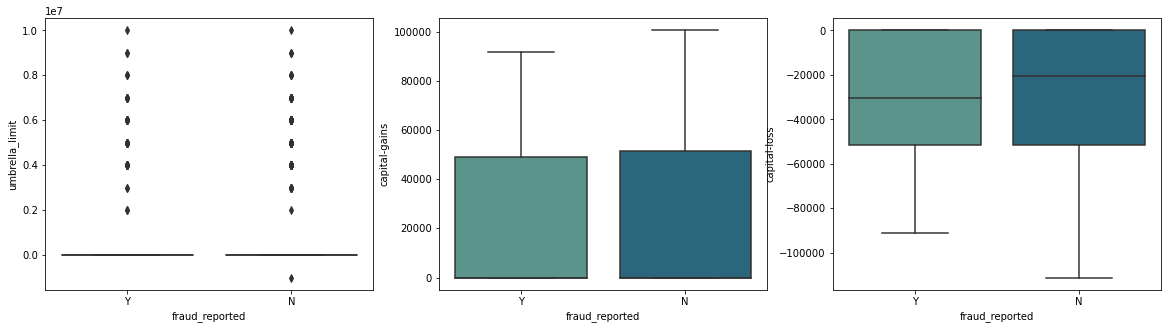

In [18]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
sns.boxplot(ax = axes[0], x = "fraud_reported", y = "umbrella_limit", data = df, palette = "crest")
sns.boxplot(ax = axes[1], x = "fraud_reported", y = "capital-gains", data = df, palette = "crest")
sns.boxplot(ax = axes[2], x = "fraud_reported", y = "capital-loss", data = df, palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

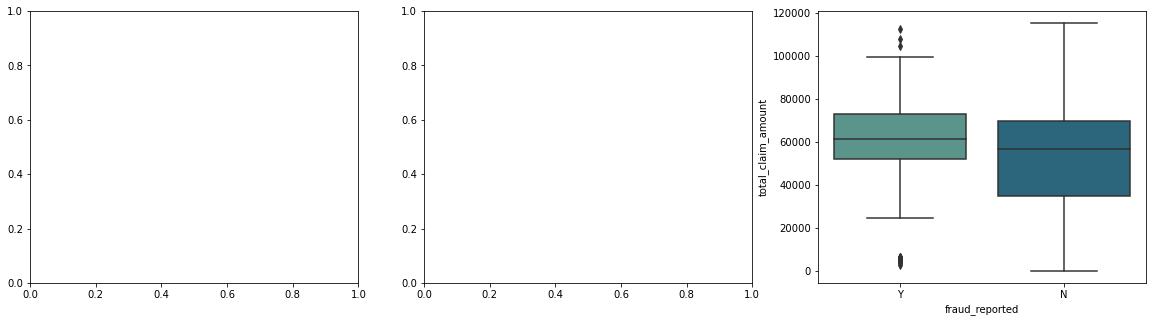

In [19]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
sns.boxplot(ax = axes[2], x = "fraud_reported", y = "total_claim_amount", data = df, palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

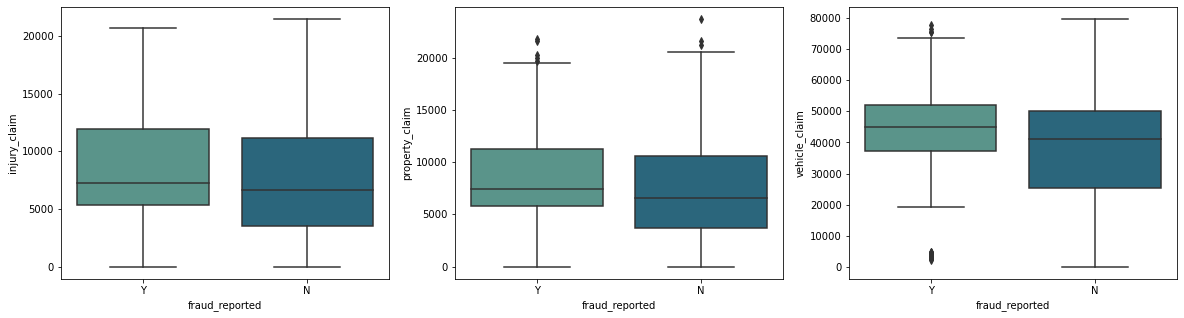

In [20]:
fig, axes = plt.subplots(1, 3, figsize = (20,5))
sns.boxplot(ax = axes[0], x = "fraud_reported", y = "injury_claim", data = df, palette = "crest")
sns.boxplot(ax = axes[1], x = "fraud_reported", y = "property_claim", data = df, palette = "crest")
sns.boxplot(ax = axes[2], x = "fraud_reported", y = "vehicle_claim", data = df, palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

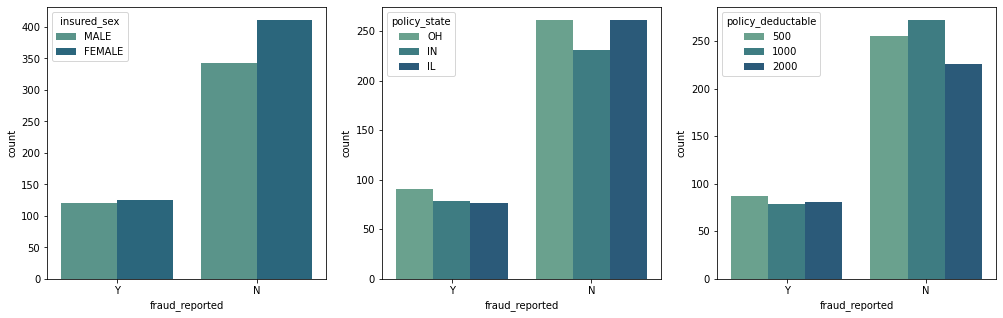

In [21]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "insured_sex", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "policy_state", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "policy_deductable", data = df, palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

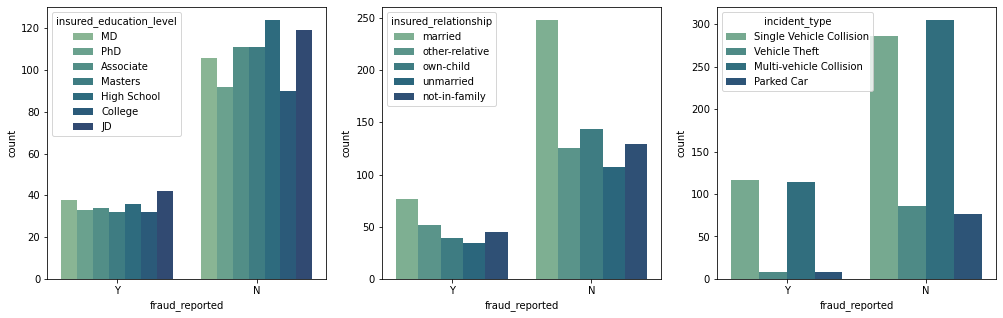

In [22]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "insured_education_level", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "insured_relationship", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "incident_type", data = df, palette = "crest")

<AxesSubplot:xlabel='porcentajes', ylabel='insured_occupation'>

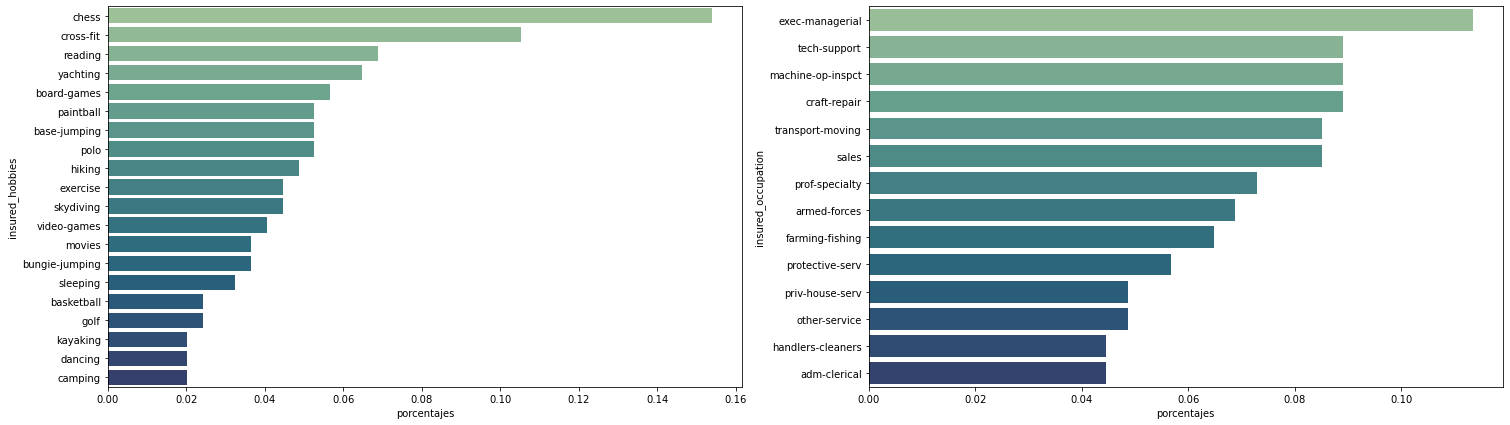

In [23]:
fig , axes = plt.subplots(1, 2, figsize = (25,7))

fraud_hobbies = pd.DataFrame(df[df['fraud_reported'] == "Y"])
fraud_hobbies = pd.DataFrame(fraud_hobbies.value_counts("insured_hobbies", normalize = True))
fraud_hobbies.reset_index(inplace = True)
fraud_hobbies.columns = ["insured_hobbies", "porcentajes"]
sns.barplot(ax = axes[0], data = fraud_hobbies, x = "porcentajes",  y = "insured_hobbies", palette = "crest")

fraud_hobbies = pd.DataFrame(df[df['fraud_reported'] == "Y"])
fraud_hobbies = pd.DataFrame(fraud_hobbies.value_counts("insured_occupation", normalize = True))
fraud_hobbies.reset_index(inplace = True)
fraud_hobbies.columns = ["insured_occupation", "porcentajes"]
sns.barplot(ax = axes[1], data = fraud_hobbies, x = "porcentajes",  y = "insured_occupation", palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

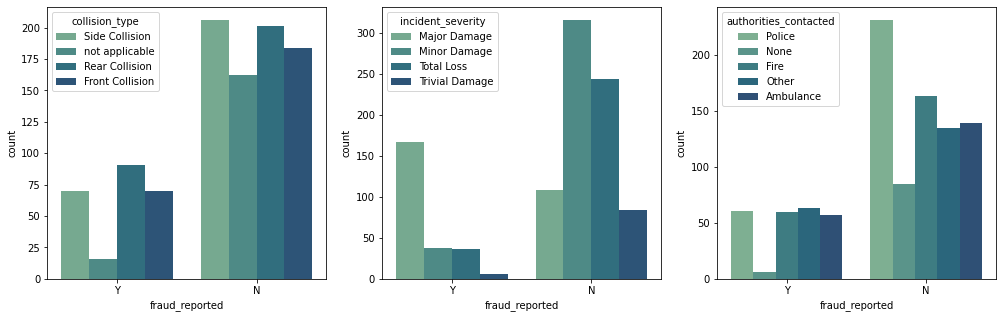

In [24]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "collision_type", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "incident_severity", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "authorities_contacted", data = df, palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

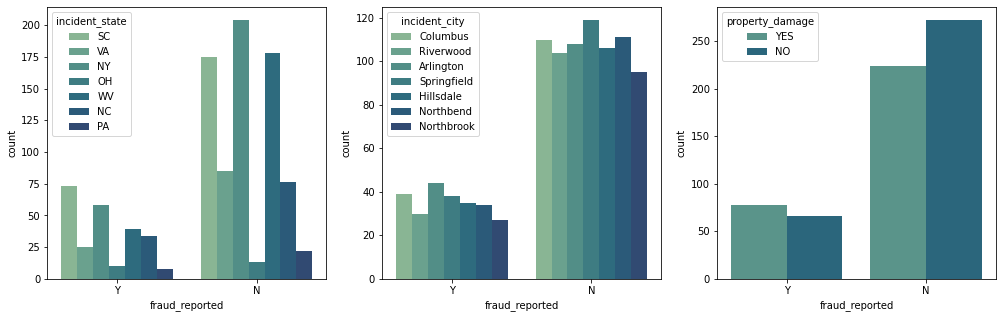

In [25]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "incident_state", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "incident_city", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "property_damage", data = df, palette = "crest")

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

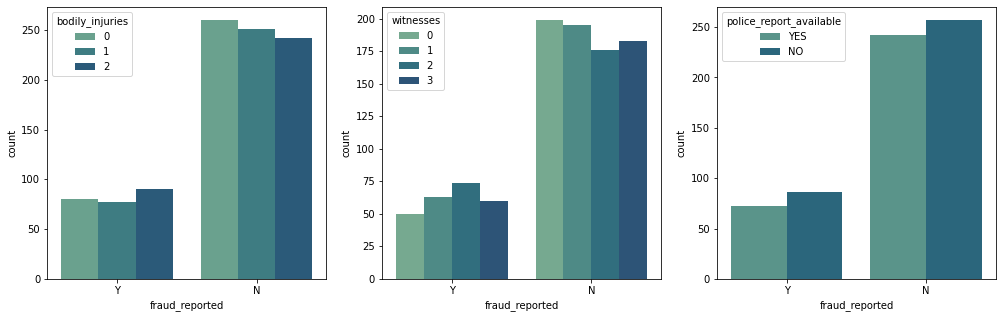

In [26]:
fig, axes = plt.subplots(1, 3, figsize = (17,5))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "bodily_injuries", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "fraud_reported", hue = "witnesses", data = df, palette = "crest")
sns.countplot(ax = axes[2], x = "fraud_reported", hue = "police_report_available", data = df, palette = "crest")

<AxesSubplot:xlabel='auto_year', ylabel='count'>

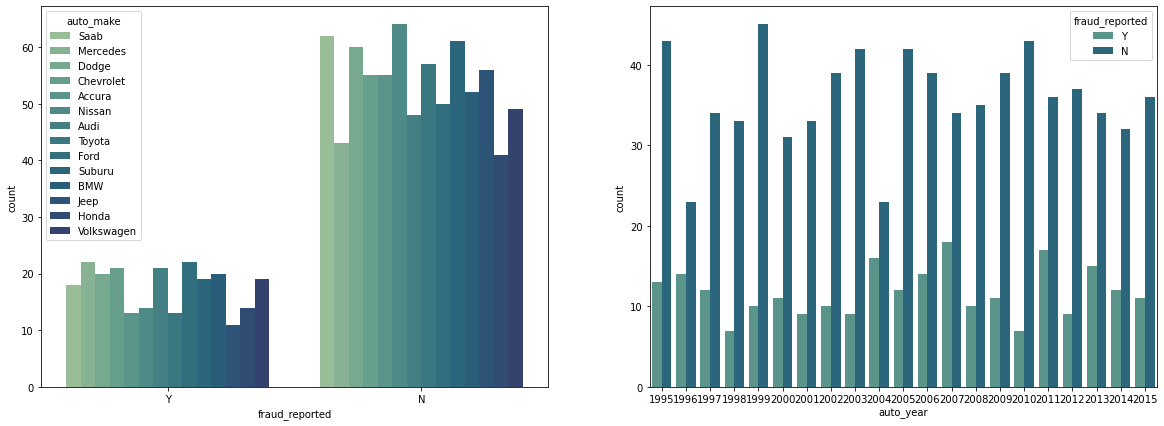

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (20,7))
sns.countplot(ax = axes[0], x = "fraud_reported", hue = "auto_make", data = df, palette = "crest")
sns.countplot(ax = axes[1], x = "auto_year", hue = "fraud_reported", data = df, palette = "crest")

Como las variables con Nan no parecen inluir en la variable respuesta, decido no tenerlas en cuenta en el modelo.

In [28]:
df.drop(["police_report_available", "property_damage", "auto_make"], axis = 1, inplace = True)

### Creación de variable dummies

In [29]:
df["fraud_reported"] = np.where(df["fraud_reported"] == 'Y', 1, df["fraud_reported"])
df["fraud_reported"] = np.where(df["fraud_reported"] == 'N', 0, df["fraud_reported"])

In [30]:
df["fraud_reported"] = df["fraud_reported"].astype(int)
df.dtypes

days_as_customer                 int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
injury_claim             

In [31]:
### Creación de las variables dummies para las variable de tipo categóricas

for i in df.columns:
    if df[i].dtypes == 'object':
        dummies = pd.get_dummies(df[i], prefix = i+'_')
        df = pd.concat([df,dummies], axis = 1)
        df.drop([i], axis = 1, inplace = True)

df.head()

days_as_customer  age  ...  auto_model__Gama alta  auto_model__Gama media
0               328   48  ...                      1                       0
1               228   42  ...                      1                       0
2               134   29  ...                      1                       0
3               256   41  ...                      0                       1
4               228   44  ...                      0                       1

[5 rows x 105 columns]

### Construcción del modelo

In [32]:
X = df.drop(["fraud_reported"], axis = 1)
X.head()

days_as_customer  age  ...  auto_model__Gama alta  auto_model__Gama media
0               328   48  ...                      1                       0
1               228   42  ...                      1                       0
2               134   29  ...                      1                       0
3               256   41  ...                      0                       1
4               228   44  ...                      0                       1

[5 rows x 104 columns]

In [33]:
Y = df["fraud_reported"]
Y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [34]:
### NORMALIZACION DE LAS VARIABLES

from sklearn import preprocessing

X_cuanti = X[["days_as_customer", "age", "policy_deductable", "policy_annual_premium", "umbrella_limit",
                "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved",
                "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim",
                "vehicle_claim", "auto_year"]]
X_dummies = [v for v in X if v not in X_cuanti]
X = df[X_dummies]

X_norm = pd.DataFrame(preprocessing.StandardScaler().fit(X_cuanti).transform(X_cuanti))
X_norm.columns = ["days_as_customer", "age", "policy_deductable", "policy_annual_premium", "umbrella_limit",
                "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved",
                "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim",
                "vehicle_claim", "auto_year"]
X = pd.concat([X_norm, X], axis = 1)
X.head()

days_as_customer       age  ...  auto_model__Gama alta  auto_model__Gama media
0          1.078140  0.990836  ...                      1                       0
1          0.208995  0.334073  ...                      1                       0
2         -0.608002 -1.088913  ...                      1                       0
3          0.452355  0.224613  ...                      0                       1
4          0.208995  0.552994  ...                      0                       1

[5 rows x 104 columns]

### Con selección automática de variables

In [70]:
from sklearn import datasets
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [71]:
lr = LogisticRegression()

X_vars = X.columns.values.tolist()

In [72]:
rfe = RFECV(lr)
rfe = rfe.fit(X, Y.values.ravel())

In [73]:
print(rfe.support_)

[ True  True  True  True]


In [74]:
z=zip(X_vars, rfe.support_, rfe.ranking_)

In [75]:
z = pd.DataFrame(z)
z.columns = ["Variable", "Bool", "Ranking"]
z = z.sort_values("Ranking")
z.head(10)

Variable  Bool  Ranking
0           insured_hobbies__chess  True        1
1       insured_hobbies__cross-fit  True        1
2         insured_hobbies__camping  True        1
3  incident_severity__Major Damage  True        1

In [101]:
### Selección de las variables que se consideran significativas para el análisis

cols = ["insured_hobbies__chess", "insured_hobbies__cross-fit", "insured_hobbies__camping", "incident_severity__Major Damage"]

#cols = ["incident_severity__Major Damage", "auto_model__Civic", "insured_hobbies__cross-fit",
#        "insured_hobbies__camping", "insured_hobbies__chess", "insured_hobbies__yachting"]

In [77]:
X = df[cols]

In [78]:
### SEPARACION DEL CONJUNTO DE DATOS EN CONJUNTO DE ENTRENAMIENTO Y DE PRUEBA

from sklearn.model_selection import train_test_split
from sklearn import linear_model

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state=1234)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (850, 4) (850,)
Test set: (150, 4) (150,)


In [79]:
lm = linear_model.LogisticRegression()
lm.fit(X_train, Y_train)
lm.score(X_train, Y_train)

0.8411764705882353

In [99]:
probs = lm.predict_proba(X_test)

In [100]:
prediction = lm.predict(X_test)

In [91]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(linear_model.LogisticRegression(), X_train, Y_train, scoring="accuracy", cv=10)
print('Los valores de los scores son: ', score)
print('La media de los scores es: ', score.mean())

Los valores de los scores son:  [0.82352941 0.85882353 0.90588235 0.84705882 0.84705882 0.77647059
 0.82352941 0.89411765 0.81176471 0.82352941]
La media de los scores es:  0.8411764705882353


In [98]:
probs = lm.predict_proba(X_test)

In [96]:
prob = probs[:,1]
prob_df = pd.DataFrame(prob)
prob
threshold = 0.1
prob_df["prediction"] = np.where(prob_df[0] >= threshold, 1, 0)
prob_df["actual"] = list(Y_test)
prob_df.head()

0  prediction  actual
0  0.073618           0       0
1  0.073618           0       0
2  0.541851           1       1
3  0.073618           0       0
4  0.073618           0       0

In [97]:
confusion_matrix = pd.crosstab(prob_df.prediction, prob_df.actual)
confusion_matrix

actual       0   1
prediction        
0           89   2
1           13  46

# Árbol de decisión para clasificación

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier

from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
from graphviz import Digraph

In [177]:
path = "/Users/ceciliaguillametchargue/Proyecto_FraudKeeper/insurance_exercise.csv"
df = pd.read_csv(path)

In [105]:
### Eliminación de variables

df.drop(['policy_number', 'insured_zip', '_c39'], axis = 1, inplace = True)


### Vemos qué variables tienen signo de interrogración

df['collision_type'].replace('?', 'not applicable', inplace = True)
df.replace('?', np.nan, inplace = True)


### Conversión a fecha

df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'], format = '%m/%d/%Y')
df['incident_date'] = pd.to_datetime(df['incident_date'], format = '%m/%d/%Y')



df["police_report_available"].replace(np.nan, )

0      YES
1      YES
2       NO
3       NO
4       NO
      ... 
995    YES
996    YES
997    YES
998    YES
999    YES
Name: police_report_available, Length: 1000, dtype: object

In [106]:
df["auto_model"] = np.where(df["auto_model"] == "92x", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "E400", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "RAM", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Tahoe", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "RSX", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "95", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Pathfinder", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "A5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Camry", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "F150", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "A3", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Highlander", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Neon", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "MDX", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Maxima", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Legacy", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "TL", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Impreza", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Forrestor", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Escape", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Corolla", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "3 series", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "C300", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Wrangler", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "M5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "X5", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Civic", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Passat", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Silverado", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "CRV", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "93", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Accord", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "X6", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Malibu", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Fusion", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Jetta", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "ML350", "Gama alta", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Ultima", "Gama media", df["auto_model"])
df["auto_model"] = np.where(df["auto_model"] == "Grand Cherokee", "Gama alta", df["auto_model"])

In [107]:
df.drop(["police_report_available", "property_damage", "incident_location", "incident_city", "auto_make"], axis = 1, inplace = True)

In [166]:
df.dtypes

days_as_customer                   int64
age                                int64
policy_bind_date          datetime64[ns]
policy_deductable                  int64
policy_annual_premium            float64
                               ...      
auto_model__3 Series               uint8
auto_model__Gama alta              uint8
auto_model__Gama media             uint8
fraud_reported__N                  uint8
fraud_reported__Y                  uint8
Length: 102, dtype: object

In [110]:
Y = df["fraud_reported"]
Y.head()

0    Y
1    Y
2    N
3    Y
4    N
Name: fraud_reported, dtype: object

In [111]:
for i in df.columns:
    if df[i].dtypes == 'object':
        dummies = pd.get_dummies(df[i], prefix = i+'_')
        df = pd.concat([df,dummies], axis = 1)
        df.drop([i], axis = 1, inplace = True)

df.head()

days_as_customer  age policy_bind_date  policy_deductable  \
0               328   48       2014-10-17               1000   
1               228   42       2006-06-27               2000   
2               134   29       2000-09-06               2000   
3               256   41       1990-05-25               2000   
4               228   44       2014-06-06               1000   

   policy_annual_premium  umbrella_limit  capital-gains  capital-loss  \
0                1406.91               0          53300             0   
1                1197.22         5000000              0             0   
2                1413.14         5000000          35100             0   
3                1415.74         6000000          48900        -62400   
4                1583.91         6000000          66000        -46000   

  incident_date  incident_hour_of_the_day  ...  incident_state__OH  \
0    2015-01-25                         5  ...                   0   
1    2015-01-21                         8  ...                   0   
2    2015-02-22                         7  ...                   0   
3    2015-01-10                         5  ...                   1   
4    2015-02-17                        20  ...                   0   

   incident_state__PA  incident_state__SC  incident_state__VA  \
0                   0                   1                   0   
1                   0                   0                   1   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   incident_state__WV  auto_model__3 Series  auto_model__Gama alta  \
0                   0                     0                      1   
1                   0                     0                      1   
2                   0                     0                      1   
3                   0                     0                      0   
4                   0                     0                      0   

   auto_model__Gama media  fraud_reported__N  fraud_reported__Y  
0                       0                  0                  1  
1                       0                  0                  1  
2                       0                  1                  0  
3                       1                  0                  1  
4                       1                  1                  0  

[5 rows x 102 columns]

In [112]:
X = df.drop(["fraud_reported__N", "fraud_reported__Y", "policy_bind_date", "incident_date"], axis = 1)
X.head()

days_as_customer  age  policy_deductable  policy_annual_premium  \
0               328   48               1000                1406.91   
1               228   42               2000                1197.22   
2               134   29               2000                1413.14   
3               256   41               2000                1415.74   
4               228   44               1000                1583.91   

   umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0               0          53300             0                         5   
1         5000000              0             0                         8   
2         5000000          35100             0                         7   
3         6000000          48900        -62400                         5   
4         6000000          66000        -46000                        20   

   number_of_vehicles_involved  bodily_injuries  ...  incident_state__NC  \
0                            1                1  ...                   0   
1                            1                0  ...                   0   
2                            3                2  ...                   0   
3                            1                1  ...                   0   
4                            1                0  ...                   0   

   incident_state__NY  incident_state__OH  incident_state__PA  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   1                   0   
4                   1                   0                   0   

   incident_state__SC  incident_state__VA  incident_state__WV  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   auto_model__3 Series  auto_model__Gama alta  auto_model__Gama media  
0                     0                      1                       0  
1                     0                      1                       0  
2                     0                      1                       0  
3                     0                      0                       1  
4                     0                      0                       1  

[5 rows x 98 columns]

In [113]:
### NORMALIZACION DE LAS VARIABLES

from sklearn import preprocessing

X_cuanti = X[["days_as_customer", "age", "policy_deductable", "policy_annual_premium", "umbrella_limit",
                "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved",
                "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim",
                "vehicle_claim", "auto_year"]]
X_dummies = [v for v in X if v not in X_cuanti]
X = df[X_dummies]

X_norm = pd.DataFrame(preprocessing.StandardScaler().fit(X_cuanti).transform(X_cuanti))
X_norm.columns = ["days_as_customer", "age", "policy_deductable", "policy_annual_premium", "umbrella_limit",
                "capital-gains", "capital-loss", "incident_hour_of_the_day", "number_of_vehicles_involved",
                "bodily_injuries", "witnesses", "total_claim_amount", "injury_claim", "property_claim",
                "vehicle_claim", "auto_year"]
X = pd.concat([X_norm, X], axis = 1)
X.head()

days_as_customer       age  policy_deductable  policy_annual_premium  \
0          1.078140  0.990836          -0.222383               0.616705   
1          0.208995  0.334073           1.412784              -0.242521   
2         -0.608002 -1.088913           1.412784               0.642233   
3          0.452355  0.224613           1.412784               0.652886   
4          0.208995  0.552994          -0.222383               1.341980   

   umbrella_limit  capital-gains  capital-loss  incident_hour_of_the_day  \
0       -0.479476       1.011331      0.953851                 -0.956261   
1        1.697980      -0.901927      0.953851                 -0.524475   
2        1.697980       0.358023      0.953851                 -0.668404   
3        2.133471       0.853388     -1.267577                 -0.956261   
4        2.133471       1.467210     -0.683741                  1.202666   

   number_of_vehicles_involved  bodily_injuries  ...  incident_state__NC  \
0                    -0.823865         0.009759  ...                   0   
1                    -0.823865        -1.210174  ...                   0   
2                     1.140056         1.229693  ...                   0   
3                    -0.823865         0.009759  ...                   0   
4                    -0.823865        -1.210174  ...                   0   

   incident_state__NY  incident_state__OH  incident_state__PA  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   1                   0                   0   
3                   0                   1                   0   
4                   1                   0                   0   

   incident_state__SC  incident_state__VA  incident_state__WV  \
0                   1                   0                   0   
1                   0                   1                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   auto_model__3 Series  auto_model__Gama alta  auto_model__Gama media  
0                     0                      1                       0  
1                     0                      1                       0  
2                     0                      1                       0  
3                     0                      0                       1  
4                     0                      0                       1  

[5 rows x 98 columns]

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

X_trainset, X_testset, Y_trainset, Y_testset = train_test_split(X, Y, test_size=0.15, random_state=1234)

In [160]:
for i in range(1,20):
    Tree = DecisionTreeClassifier(criterion = "entropy", max_depth = i, min_samples_split = 5, random_state = 1234)
    Tree.fit(X_trainset, Y_trainset)
    CV = KFold(n_splits = 10, shuffle = True, random_state = 1)
    scores = cross_val_score(Tree, X_trainset, Y_trainset, scoring = "accuracy", cv = CV, n_jobs = 1)
    score=np.mean(scores)
    print("Score para i = ", i, " es de ", score)

Score para i =  1  es de  0.8058823529411765
Score para i =  2  es de  0.8305882352941177
Score para i =  3  es de  0.8305882352941175
Score para i =  4  es de  0.8411764705882353
Score para i =  5  es de  0.8235294117647058
Score para i =  6  es de  0.8223529411764705
Score para i =  7  es de  0.8164705882352941
Score para i =  8  es de  0.8129411764705882
Score para i =  9  es de  0.8058823529411765
Score para i =  10  es de  0.7952941176470588
Score para i =  11  es de  0.7870588235294118
Score para i =  12  es de  0.7788235294117647
Score para i =  13  es de  0.7776470588235294
Score para i =  14  es de  0.7847058823529413
Score para i =  15  es de  0.7752941176470589
Score para i =  16  es de  0.7705882352941177
Score para i =  17  es de  0.78
Score para i =  18  es de  0.7764705882352941
Score para i =  19  es de  0.7741176470588236


In [162]:
Tree = DecisionTreeClassifier(criterion="entropy", min_samples_split = 20, min_samples_leaf = 5, max_depth = 4, class_weight = "balanced")
Tree # it shows the default parameters

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=5, min_samples_split=20)

In [163]:
Tree.fit(X_trainset, Y_trainset)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=4, min_samples_leaf=5, min_samples_split=20)

In [164]:
predTree = Tree.predict(X_testset)

In [151]:
print(predTree[0:5])
print(Y_testset[0:5])

['Y' 'N' 'Y' 'N' 'N']
173    N
201    N
929    Y
725    N
248    N
Name: fraud_reported, dtype: object


In [152]:
Tree.score(X_trainset, Y_trainset)

0.8552941176470589

In [153]:
from sklearn import metrics

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_testset, predTree))

DecisionTrees's Accuracy:  0.8466666666666667


### Visualización del árbol de decisión

In [165]:
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline
from graphviz import Digraph

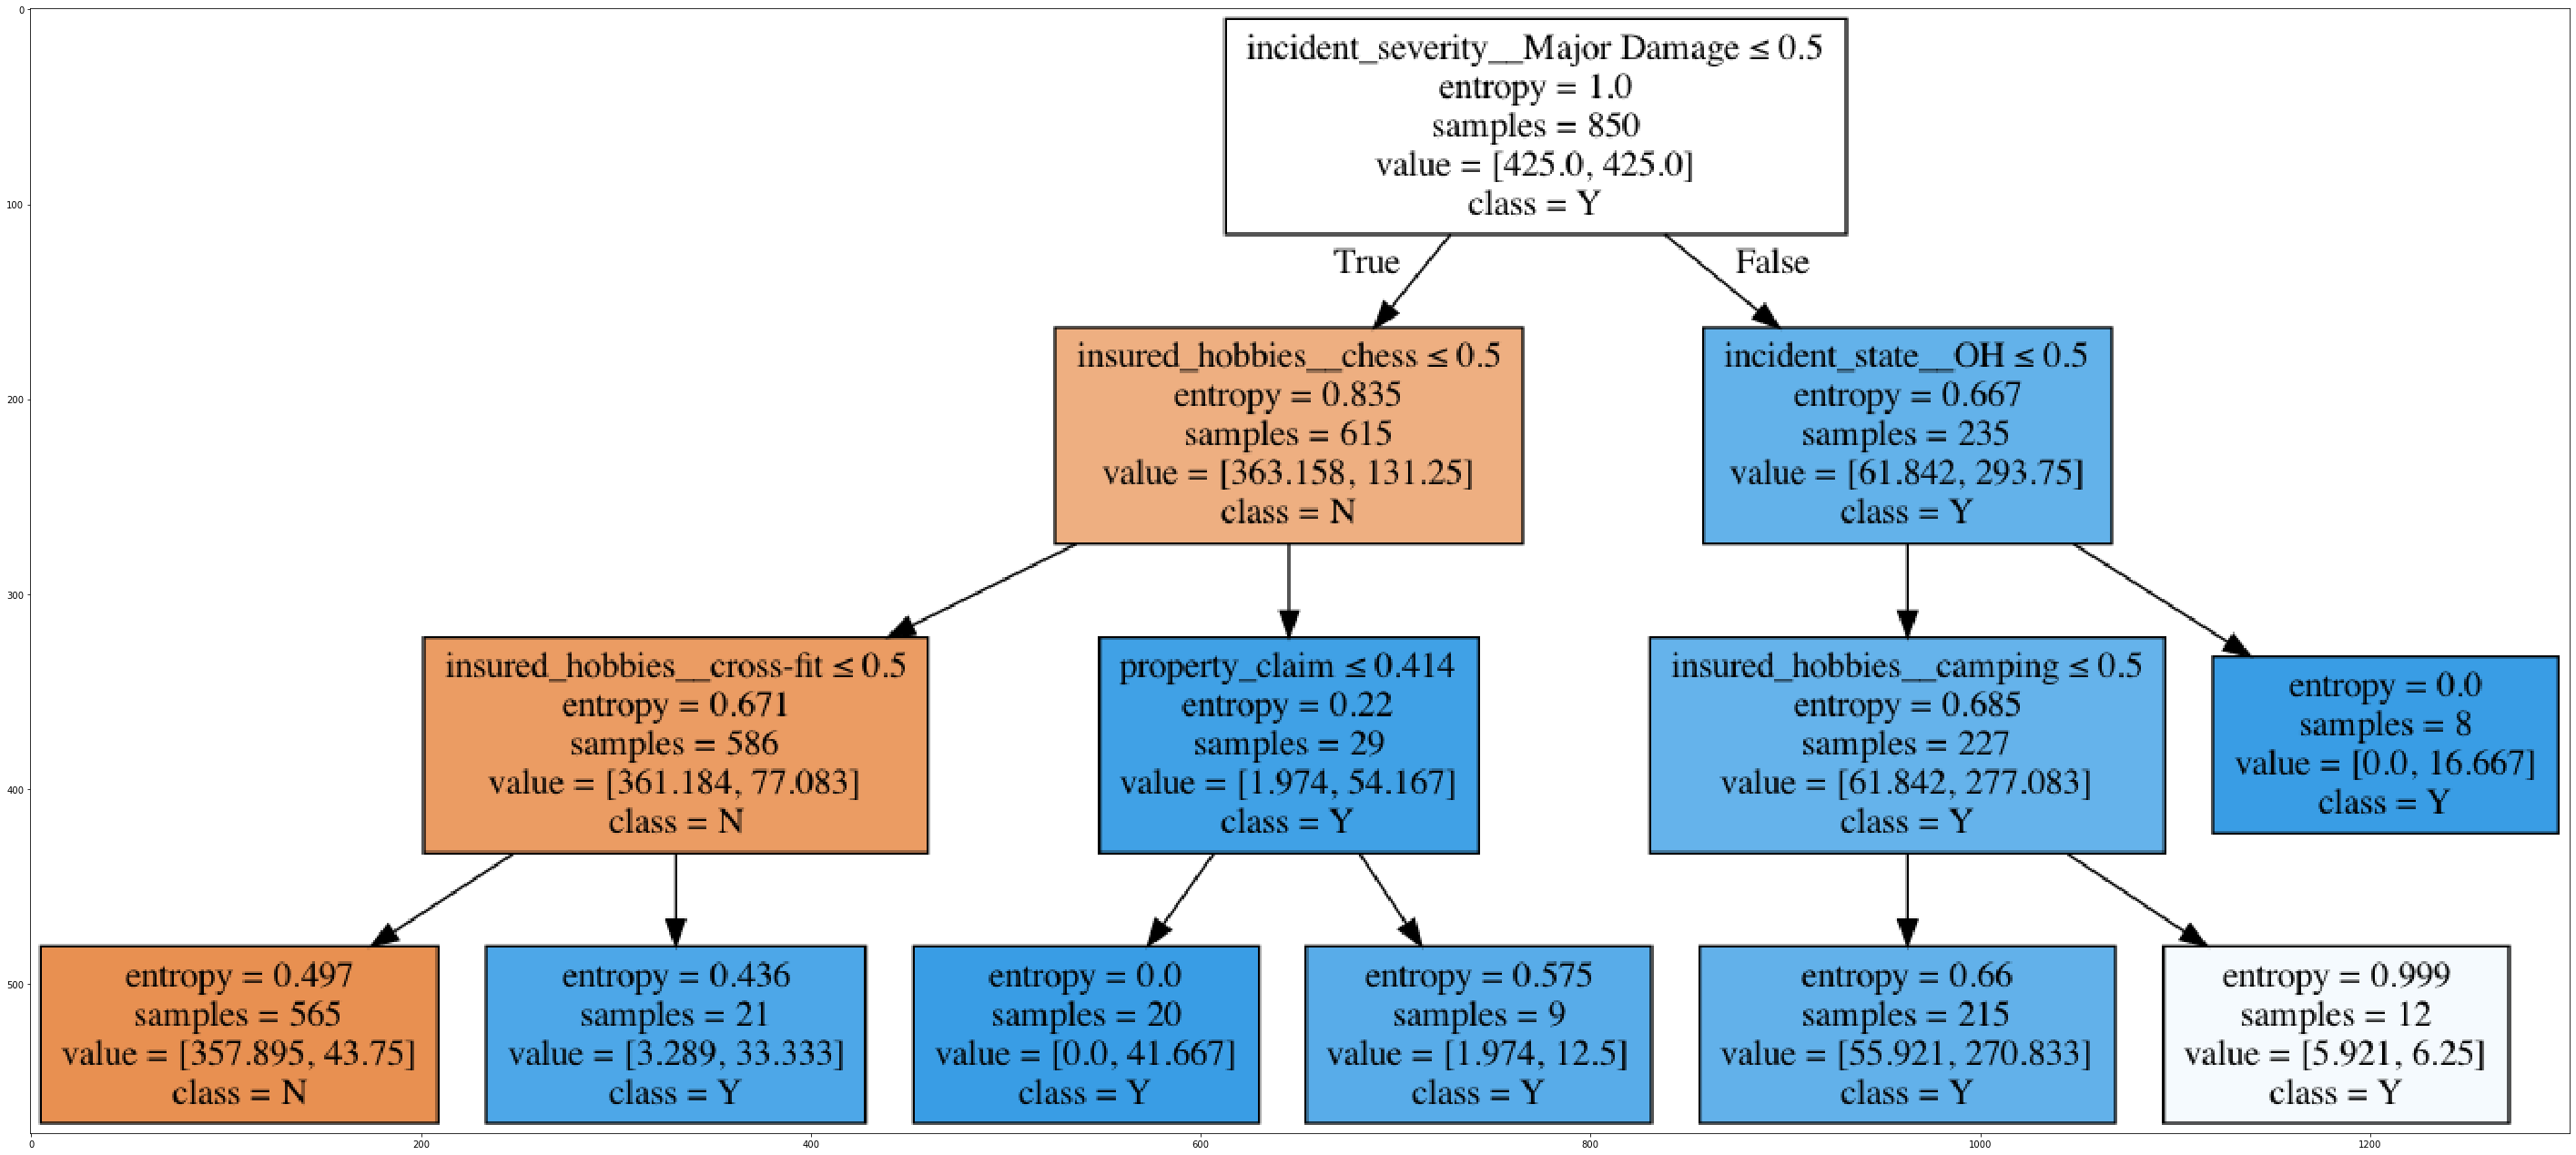

In [155]:
dot_data = StringIO()
filename = "tree.png"
featureNames = X.columns
out=tree.export_graphviz(Tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(Y_trainset), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 50))
plt.imshow(img,interpolation='nearest')

In [156]:
confusion_matrix = pd.crosstab(predTree, Y_testset)
confusion_matrix

fraud_reported   N   Y
row_0                 
N               91   7
Y               16  36